In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df= pd.read_csv('crop.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label,district
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,ryk
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,bahawalnagar
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,bwp
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,rajanpur
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,digikhan
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,cotton,khanewal
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,cotton,vihari
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,cotton,muzafargarh
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,cotton,layyah


In [10]:
df[df['label'] == 'coffee']



,N,P,K,temperature,humidity,ph,rainfall,label,district


In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
df.corr(numeric_only=True)

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

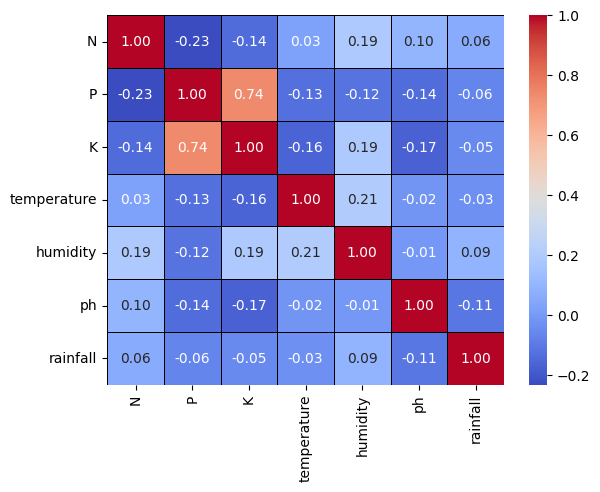

In [8]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')

In [9]:
df.Crop.value_counts()

AttributeError: 'DataFrame' object has no attribute 'Crop'

In [ ]:
df['Crop'].unique().size

35

In [ ]:
import matplotlib.pyplot as plt

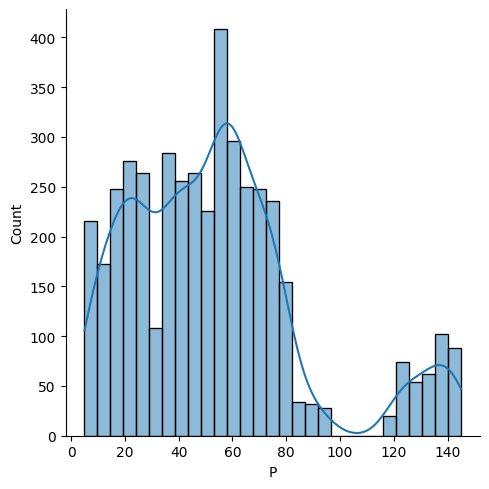

In [ ]:
sns.displot(df['P'], kde=True)
plt.show()

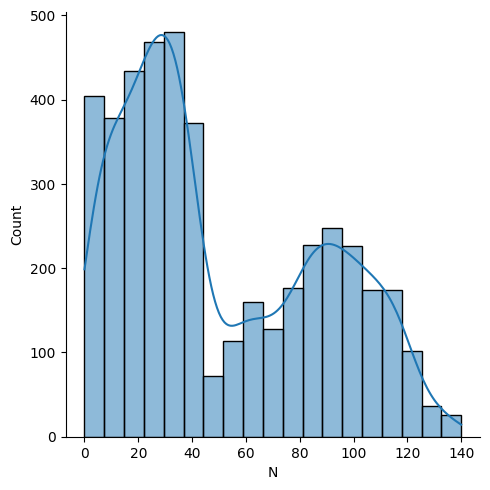

In [ ]:
sns.displot(df['N'], kde=True)
plt.show()

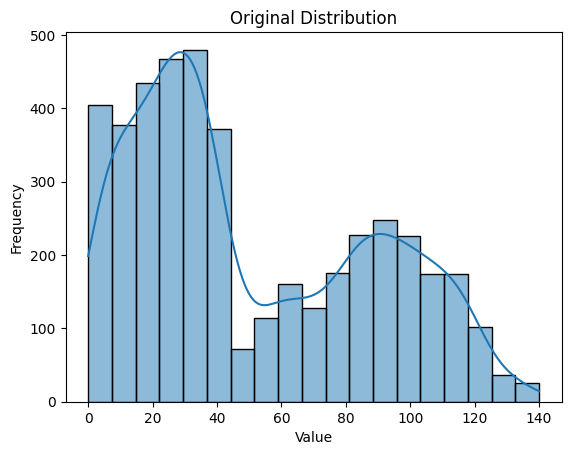

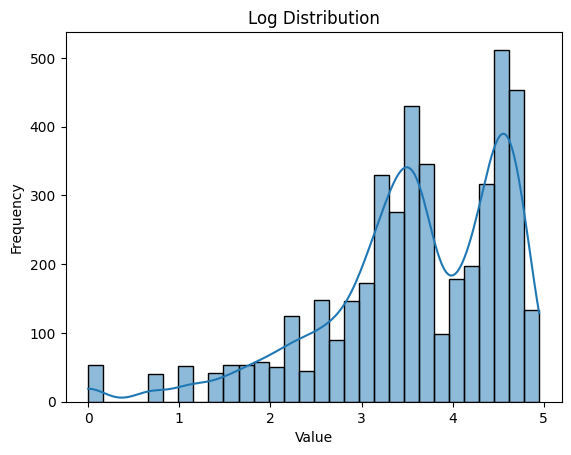

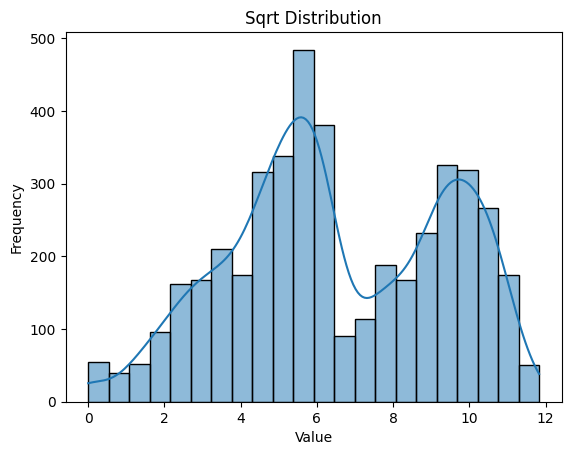

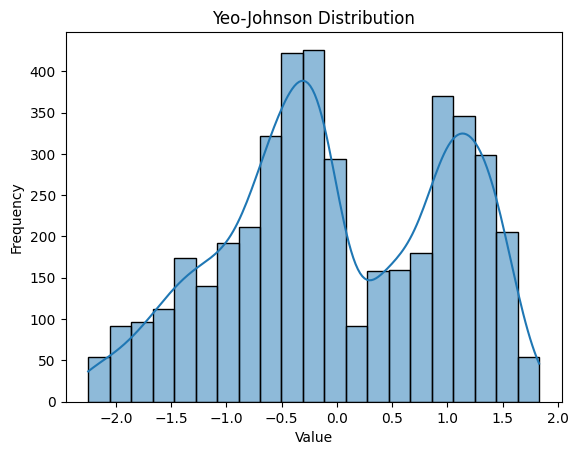

Skewness:
N: 0.5095
N_log: -1.0596
N_sqrt: -0.0723
N_yeojohn: -0.1297

Shapiro-Wilk Test:
N: stat=0.9154, p-value=0.0000 ❌ Not normal
N_log: stat=0.9143, p-value=0.0000 ❌ Not normal
N_sqrt: stat=0.9650, p-value=0.0000 ❌ Not normal
N_yeojohn: stat=0.9635, p-value=0.0000 ❌ Not normal


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from scipy.stats import shapiro

# Log Transform (only if values > 0)
df['N_log'] = np.log(df['N'] + 1)  # +1 to avoid log(0)

# Sqrt Transform
df['N_sqrt'] = np.sqrt(df['N'])

# Yeo-Johnson Transform (works for any values)
pt = PowerTransformer(method='yeo-johnson')
df['N_yeojohn'] = pt.fit_transform(df[['N']])

# ==== Plotting All ====
transforms = ['N', 'N_log', 'N_sqrt', 'N_yeojohn']
titles = ['Original', 'Log', 'Sqrt', 'Yeo-Johnson']

for col, title in zip(transforms, titles):
    sns.histplot(df[col], kde=True)
    plt.title(f'{title} Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

# ==== Skewness ====
print("Skewness:")
for col in transforms:
    print(f"{col}: {df[col].skew():.4f}")

# ==== Shapiro-Wilk Normality Test ====
print("\nShapiro-Wilk Test:")
for col in transforms:
    stat, p = shapiro(df[col])
    print(f"{col}: stat={stat:.4f}, p-value={p:.4f} {'✅ Normal' if p > 0.05 else '❌ Not normal'}")



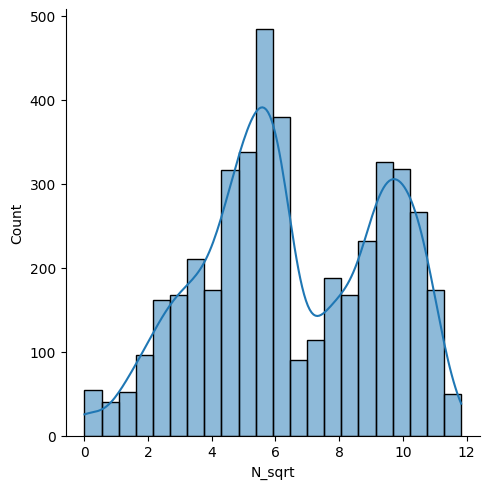

In [ ]:
sns.displot(df['N_sqrt'], kde=True)
plt.show()


In [ ]:
df.Crop.unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee', 'rice',
       'maize', 'pulses', 'millets', 'sugarcane', 'mungbean', 'blackgram',
       'lentil', 'wheat', 'banana', 'mango', 'grapes', 'cotton'],
      dtype=object)

In [ ]:
df.head()

,N,P,K,ph,Rainfall,Temperature,Humidity,Crop,N_log,N_sqrt,N_yeojohn
0,90,42,43,6.502985,202.935536,20.879744,82.002744,Rice,4.510860,9.486833,1.051047
1,85,58,41,7.038096,226.655537,21.770462,80.319644,Rice,4.454347,9.219544,0.960517
2,60,55,44,7.840207,263.964248,23.004459,82.320763,Rice,4.110874,7.745967,0.453737
3,74,35,40,6.980401,242.864034,26.491096,80.158363,Rice,4.317488,8.602325,0.749884
4,78,42,42,7.628473,262.717340,20.130175,81.604873,Rice,4.369448,8.831761,0.828446


In [ ]:
X = df.drop(['crop', 'Crop', 'N_log', 'N_yeojohn', 'N_sqrt'], axis=1)
y = df['crop_encoded']


KeyError: "['crop_encoded'] not found in axis"

In [ ]:
y.sample(5)

1915    20
1501    16
2171    22
748      8
3602     2
Name: crop_encoded, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:

X_train.shape

(3520, 7)

In [ ]:

from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

In [ ]:
X_train


array([[0.52857143, 0.36428571, 0.085     , ..., 0.21830327, 0.27139159,
        0.61128258],
       [0.38571429, 0.44285714, 0.235     , ..., 0.43516203, 0.77047743,
        0.92212835],
       [0.27857143, 1.        , 0.98      , ..., 0.18692745, 0.80073851,
        0.77377871],
       ...,
       [0.05      , 0.48571429, 0.1       , ..., 0.08980509, 0.53647858,
        0.57013446],
       [0.07142857, 0.93571429, 0.995     , ..., 0.30768644, 0.35503333,
        0.90870772],
       [0.22857143, 0.52142857, 0.085     , ..., 0.11926686, 0.43458302,
        0.5610754 ]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)


In [ ]:
X_train

array([[0.52857143, 0.36428571, 0.085     , ..., 0.21830327, 0.27139159,
        0.61128258],
       [0.38571429, 0.44285714, 0.235     , ..., 0.43516203, 0.77047743,
        0.92212835],
       [0.27857143, 1.        , 0.98      , ..., 0.18692745, 0.80073851,
        0.77377871],
       ...,
       [0.05      , 0.48571429, 0.1       , ..., 0.08980509, 0.53647858,
        0.57013446],
       [0.07142857, 0.93571429, 0.995     , ..., 0.30768644, 0.35503333,
        0.90870772],
       [0.22857143, 0.52142857, 0.085     , ..., 0.11926686, 0.43458302,
        0.5610754 ]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, r2_score

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB':GaussianNB(),
    'SVC':SVC(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'ExtraTreeClassifier':ExtraTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier()
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    r2_score = r2_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score}")

LogisticRegression model with accuracy: 0.6420454545454546
GaussianNB model with accuracy: 0.6681818181818182
SVC model with accuracy: 0.6568181818181819
KNeighborsClassifier model with accuracy: 0.5306818181818181
DecisionTreeClassifier model with accuracy: 0.4954545454545455
ExtraTreeClassifier model with accuracy: 0.49318181818181817
RandomForestClassifier model with accuracy: 0.5022727272727273
BaggingClassifier model with accuracy: 0.49886363636363634
GradientBoostingClassifier model with accuracy: 0.5


c:\Users\Akash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier model with accuracy: 0.1431818181818182


In [ ]:
gnb= GaussianNB()
gnb.fit(X_train, y_train)   
y_pred = gnb.predict(X_test)
accuracy_score(y_test, y_pred)

0.6681818181818182

In [ ]:
df.head()

,N,P,K,ph,Rainfall,Temperature,Humidity,Crop,N_log,N_sqrt,N_yeojohn,crop_encoded
0,90,42,43,6.502985,202.935536,20.879744,82.002744,rice,4.510860,9.486833,1.051047,1
1,85,58,41,7.038096,226.655537,21.770462,80.319644,rice,4.454347,9.219544,0.960517,1
2,60,55,44,7.840207,263.964248,23.004459,82.320763,rice,4.110874,7.745967,0.453737,1
3,74,35,40,6.980401,242.864034,26.491096,80.158363,rice,4.317488,8.602325,0.749884,1
4,78,42,42,7.628473,262.717340,20.130175,81.604873,rice,4.369448,8.831761,0.828446,1


In [ ]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    mx_features = mx.fit_transform(features)
    sc_mx_features = sc.fit_transform(mx_features)
    prediction = gnb.predict(sc_mx_features)
    return df.Crop.unique()[prediction[0]]

In [ ]:
N=90
P= 42
K= 43
temperature= 20.879744
humidity=82.002744
ph=6.502985
rainfall=202.935536

predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)

In [ ]:
predict

'wheat'